 


This is real real-time bidding data that is used to predict if an advertiser should bid for a marketing slot e.g. a banner on a webpage. Explanatory variables are things like browser, operation system or time of the day the user is online, marketplace his identifiers were traded on earlier, etc. The column 'convert' is 1, when the person clicked on the ad, and 0 if this is not the case

Analyze, Visualize and create a decision tree classification model on the dataset


# Loading the dataset


We have 1 million records with 88 principle components that can be used to predict our target variable convert.



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
df= pd.read_csv('/content/drive/My Drive/biddings (1).csv')

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,convert
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,-0.27,0.50,-0.55,-0.27,-0.89,-0.01,-0.53,1.19,-0.36,0.07,0.01,0.08,0.06,0.18,0.47,0.33,0.49,-0.33,0.32,-0.05,0.20,0.12,-0.07,0.11,0.07,-0.04,-0.12,-0.00,-0.08,-0.02,...,-0.41,-0.62,-1.09,-0.27,0.03,-0.15,-1.67,0.49,-0.08,-0.10,-0.31,-0.20,1.16,-0.49,-0.26,1.34,1.02,1.28,-0.58,-1.17,0.02,-1.59,-1.17,-0.59,0.76,0.05,1.06,-0.12,0.18,-1.82,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,-0.36,-0.23,-0.07,0.61,1.04,-1.99,1.85,0.69,0.22,3.86,0.14,0.39,0.51,0.61,1.06,0.74,0.33,0.09,-0.12,0.16,0.16,0.16,-0.00,-0.01,-0.02,-0.13,-0.08,-0.06,-0.00,0.02,...,-0.23,-0.18,0.43,0.56,-1.62,-0.67,-1.53,0.64,0.24,-1.03,-0.49,-0.62,-1.75,0.12,0.07,-0.17,1.30,1.52,-0.56,-0.99,1.14,1.20,-1.82,3.23,1.23,0.08,1.17,-1.43,2.69,-0.30,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,-0.97,1.17,-0.54,-0.21,-0.21,-1.44,-0.92,-0.78,0.45,-0.03,-0.09,0.16,0.30,-0.83,0.05,1.43,1.33,-0.85,0.20,-0.11,0.39,0.13,0.01,0.09,-0.01,-0.12,-0.03,-0.03,0.06,0.06,...,0.17,-0.04,2.03,0.00,-0.66,0.77,-1.05,0.47,0.77,0.50,-1.14,-1.12,-0.34,0.40,-0.39,-0.21,-1.23,0.44,-0.12,-0.40,-0.54,0.63,0.27,-1.06,-0.38,0.11,0.43,-0.44,0.55,-0.72,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,-0.07,-0.27,0.02,0.30,0.79,-2.49,0.44,0.69,0.32,3.81,0.15,-0.23,0.45,0.58,0.87,0.81,0.02,0.11,-0.09,0.09,0.12,0.15,0.02,-0.02,0.02,0.17,-0.17,-0.01,0.04,0.02,...,-0.28,-0.23,-0.45,0.68,-0.98,0.24,-0.54,1.93,-0.06,-0.33,0.41,0.03,0.77,0.15,-0.28,-0.52,0.33,0.87,-0.34,0.26,-0.57,0.52,0.23,-0.58,-0.12,0.06,-0.74,0.56,0.39,0.29,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,-0.28,-1.12,4.90,-0.49,3.59,2.74,0.94,1.34,-0.61,0.44,0.38,-0.53,0.07,0.64,-0.68,-0.92,-1.68,0.81,0.17,-0.44,1.38,0.82,0.48,-0.32,-0.83,0.80,-1.52,0.07,0.54,0.14,...,-0.15,-0.57,-0.31,-0.07,-0.04,0.22,-0.01,0.22,-0.20,-0.30,-1.68,-0.04,0.43,-0.09,0.00,0.54,-1.74,-0.87,0.74,1.48,0.19,0.82,0.49,0.59,1.71,-0.02,-0.77,-0.68,0.38,-0.09,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.01,-2.42,2.00,-0.50,0.55,0.21,0.11,0.15,-0.15,0.77,-0.56,0.25,-0.58,0.32,-0.32,1.06,0.66,-1.30,0.28,0.55,0.02,0.82,0.05,0.53,0.23,0.16,-1.00,0.36,0.01,0.00,0.09,0.10,-0.04,-0.04,-0.01,-0.05,-0.18,-0.01,-0.07,-0.02,...,-0.39,-0.74,-2.07,0.08,0.39,-0.15,0.04,0.17,-0.81,0.20,0.70,1.39,1.42,1.06,-0.94,0.18,-1.63,-1.21,1.26,0.66,-1.35,1.07,0.67,0.55,-0.77,-0.18,0.59,-0.94,1.99,0.73,0.27,0.35,-1.18,-1.51,-0.00,-0.97,-0.00,-0.44,0.13,0
999996,-0.02,2.84,-3.70,-0.15,-0.67,2.65,2.59,-0.85,-0.21,-0.68,-0.16,-0.02,-0.91,0.59,0.41,0.81,0.05,0.48,-0.22,-0.09,-0.15,-0.66,0.16,-0.26,-0.72,1.03,-0.57,0.30,0.39,-0.14,-0.04,-0.07,-0.15,0.05,0.03,0.12,0.00,0.02,0.06,0.03,...,0.09,-0.11,0.82,-0.49,0.12,0.12,0.08,-0.55,0.03,0.16,-0.58,0.54,-0.75,0.10,-0.24,-0.70,0.35,0.18,0.35,-0.03,-0.03,-0.89,1.49,-0.50,-0.43,0.07,0.47,-0.16,0.34,0.33,-0.10,0.88,0.50,-0.05,-0.89,-0.04,0.17,0.12,-0.01,0
999997,-0.01,-0.29,-1.90,-0.81,1.02,0.42,0.13,0.79,-0.58,0.60,-0.27,0.91,-0.10,-0.77,-0.30,-1.35,-0.61,-0.66,0.42,-0.03,-0.08,0.16,0.26,-0.58,0.15,1.30,1.26,-0.79,0.17,-0.05,0.33,0.11,-0.02,0.08,0.04,-0.17,0.02,-0.03,-0.01,0.08,...,-0.27,-0.03,0.76,0.21,-0.34,-0.10,-0.49,-1.45,1.06,-0.09,1.95,-0.76,1.06,0.42,0.11,-0.62,1.34,-0.30,0.04,1.

In [2]:
print(df.shape)

(1000000, 89)


# 1.Checking the target classes

Text(0, 0.5, 'Count')

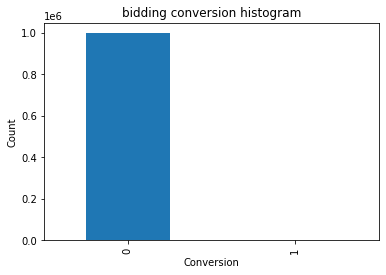

In [3]:
count_classes = pd.value_counts(df['convert'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("bidding conversion histogram")
plt.xlabel("Conversion")
plt.ylabel("Count")

The data is heavily unbalanced. Less than 1% belongs to converted users.



# 2.Undersample the data

In [9]:
def undersample(df, ratio=1):
    conv = df[df.convert == 1]
    oth = df[df.convert == 0].sample(n=ratio*len(conv))
    return pd.concat([conv, oth]).sample(frac=1) #shuffle data

ustrain = undersample(train)

y = ustrain.convert
x = ustrain.drop('convert', axis=1)

print("Remaining rows", len(ustrain))

Remaining rows 3062


 We reduced our dataset from 0.8 million records to roughly 3000, so we don't use 99 percent of the original dataset anymore. This seems like we would introduce a lot of bias, so to generalise we need to do this step multiple times and obtain many different undersampled datasets to train our model on.

# 3.Fitting Model

In [20]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import auc,roc_curve
from sklearn.metrics import f1_score

Creating Train and Test Sets

Now, let’s split the dataset in an 80:20 ratio for training and test set respectively:

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Let’s take a look at the shape of the created train and test sets:

In [17]:

print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (2449, 88)
Shape of X_test=> (613, 88)
Shape of Y_train=> (2449,)
Shape of Y_test=> (613,)


# 4.Building and Evaluating the Model

Since we have both the training and testing sets, it’s time to train our model and classify the loan applications. We will train a decision tree on this dataset:

In [18]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

In [21]:
# Evaluation on Training set
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,dt_pred_train))

Training Set Evaluation F1-Score=> 0.9934372436423297


In [22]:
# Evaluating on Test set
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,dt_pred_test))

Testing Set Evaluation F1-Score=> 0.559349593495935


In [29]:
from sklearn.tree import DecisionTreeClassifier
msl_s = [1,2,4,8,16,32,64,128,256]
scores = list()
scores_std = list()
dect = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                              random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

for msl in msl_s:
    rf.min_samples_leaf = msl
    this_scores = cross_val_score(rf, x, y, cv=4,scoring='roc_auc')
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
    
dect_results = pd.DataFrame({'score':scores, 'Minimum samples leaf': msl_s}) 
dect_results

,score,Minimum samples leaf
0,0.633534,1
1,0.637199,2
2,0.651083,4
3,0.654057,8
4,0.664907,16
5,0.674650,32
6,0.674406,64
7,0.667190,128
8,0.654908,256


In [32]:
y_preds = []
dect.min_samples_leaf = int(dect_results.loc[dect_results['score'].idxmax()]['Minimum samples leaf'])
y_preds.append(dect.fit(x,y).predict_proba(test.drop('convert', axis=1))[:,1])

# 5.Evaluate the Fit
Now we are going to test how good Decision Tree Model is performing with regard to the imbalanced test set, we reserved in the beginning. We are going to use the model with the best parameters (selected with sklearn cross-validation)

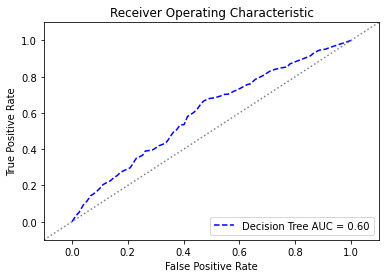

In [34]:
model = ['Decision Tree']
colors = ['b']

for i in range(0,1):
    fpr, tpr, thresholds = roc_curve(test.convert,y_preds[i])
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr, tpr, 'b',label='%s AUC = %0.2f'% (model[i] ,roc_auc),  color=colors[i], linestyle='--')
    plt.legend(loc='lower right')
    
plt.title('Receiver Operating Characteristic')
plt.plot([-0.1,1.1],[-0.1,1.1],color='gray', linestyle=':')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()